# Graph based response types

In [15]:
import os
import dotenv
from openai import AzureOpenAI

dotenv.load_dotenv()

client = AzureOpenAI(
        api_key = os.getenv("AZURE_OPENAI_API_KEY"),  
        api_version = "2024-08-01-preview",
        azure_endpoint = os.getenv("AZURE_OPENAI_ENDPOINT")
    )

deployment_name = os.getenv("AZURE_OPENAI_COMPLETION_DEPLOYMENT_NAME")
deployment_name="gpt-4o"
print(deployment_name)

gpt-4o


In [16]:
from pydantic import BaseModel, Field
from typing import List
import graphviz
from IPython.display import Image

class Node(BaseModel):
    id: int
    label: str
    color: str

class Edge(BaseModel):
    source: int
    target: int
    label: str
    color: str

class KnowledgeGraph(BaseModel):
    nodes: List[Node] = Field(default_factory=list)
    edges: List[Edge] = Field(default_factory=list)
    description: str = None

    def visualize(self):
        dot = graphviz.Digraph(comment="Knowledge Graph")
        dot.format = 'svg'

        for node in self.nodes:
            dot.node(str(node.id), label=node.label, color=node.color)

        for edge in self.edges:
            dot.edge(str(edge.source), str(edge.target), label=edge.label, color=edge.color)
        
        dot.render("knowledge_graph", view=False)
        display(dot)
        # dot.view("knowledge_graph", directory='./')
    

def generate_graph(input) -> KnowledgeGraph:
    completion = client.beta.chat.completions.parse(
        model = deployment_name,
        messages = [{"role" : "assistant", "content" : f""" Help me understand the following by describing as a detailed knowledge graph:  {input}"""}],
        response_format = KnowledgeGraph)
    
    print(completion)

    return completion.choices[0].message.parsed
    


ParsedChatCompletion[KnowledgeGraph](id='chatcmpl-APpO83qbM8jEUGnl7dvy7CnRVTIu7', choices=[ParsedChoice[KnowledgeGraph](finish_reason='stop', index=0, logprobs=None, message=ParsedChatCompletionMessage[KnowledgeGraph](content='{"nodes":[{"id":0,"label":"Cars","color":"blue"},{"id":1,"label":"Trains","color":"green"},{"id":2,"label":"Wheels","color":"purple"},{"id":3,"label":"Speed","color":"red"},{"id":4,"label":"Friction","color":"orange"},{"id":5,"label":"Rubber Wheels","color":"yellow"},{"id":6,"label":"Steel Wheels","color":"gray"}],"edges":[{"source":0,"target":2,"label":"have","color":"black"},{"source":1,"target":2,"label":"have","color":"black"},{"source":2,"target":3,"label":"influence","color":"black"},{"source":2,"target":4,"label":"affected by","color":"black"},{"source":4,"target":3,"label":"affects","color":"black"},{"source":5,"target":4,"label":"have high friction","color":"black"},{"source":6,"target":4,"label":"have low friction","color":"black"},{"source":5,"target":

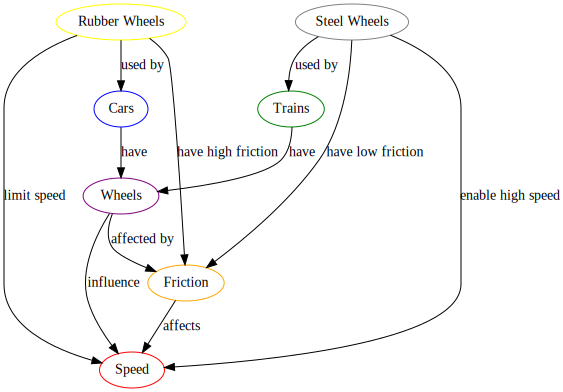

'This graph outlines the relationship between cars, trains, and wheels, focusing on how wheel material influences speed through friction. Cars predominantly use rubber wheels that have higher friction, potentially limiting speed. In contrast, trains utilize steel wheels that offer lower friction, allowing for higher speeds.'

In [17]:
graph = generate_graph("What is the relationship between cars, wheels and trains in relation to the speed that can be achieved relative to the friction of the wheel and the difference of the material the wheel is made of comparing rubber and steel wheels")
graph.visualize()
graph.description

ParsedChatCompletion[KnowledgeGraph](id='chatcmpl-APpODif6uKCSetSHFrQcaPRuYaA2z', choices=[ParsedChoice[KnowledgeGraph](finish_reason='stop', index=0, logprobs=None, message=ParsedChatCompletionMessage[KnowledgeGraph](content='{"nodes":[{"id":1,"label":"Stocks","color":"#FFD700"},{"id":2,"label":"Bonds","color":"#DAA520"},{"id":3,"label":"Public Spending","color":"#8B8000"},{"id":4,"label":"Interest Rates","color":"#ADFF2F"},{"id":5,"label":"Inflation","color":"#FF4500"},{"id":6,"label":"Housing Market","color":"#4682B4"},{"id":7,"label":"ETF (Exchange Traded Funds)","color":"#6495ED"},{"id":8,"label":"Corporate Bonds","color":"#7B68EE"}],"edges":[{"source":1,"target":6,"label":"Influences","color":"#FFA07A"},{"source":1,"target":7,"label":"Affects","color":"#FFA07A"},{"source":2,"target":6,"label":"Impacts","color":"#B0E0E6"},{"source":2,"target":8,"label":"Influences","color":"#B0E0E6"},{"source":3,"target":6,"label":"Boosts","color":"#FFDEAD"},{"source":3,"target":8,"label":"Adds Li

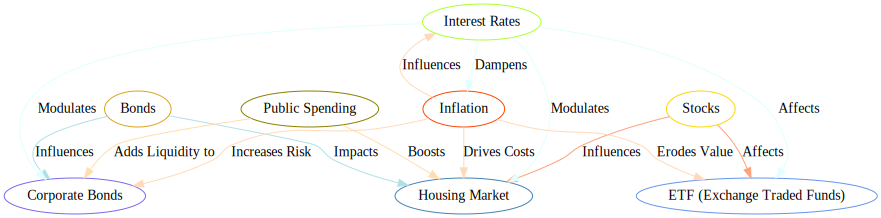

In [18]:
knowledge_graph = generate_graph("Create a taxonomy of terms from financial industry. Explain to me how the relationship between stocks, bonds, public spending, interest rates and inflation are having positive effects or negative effects on housing market, ETF and corporate bonds")
knowledge_graph.visualize()